# Exploratory Data Analysis
See what interesting trends exist in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from secom import data

%matplotlib inline

DATA_PATH = "../../data"

In [2]:
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.rcParams.update({'font.size': 22})


## Secom Labels Dataset

In [3]:
secom_labels = data.load_secom_labels(DATA_PATH, human_labels=True, feature_engineer=False)

In [4]:
secom_labels.shape

(1567, 2)

In [5]:
counts = secom_labels["s_label_target"].value_counts()

In [6]:
counts

Pass    1463
Fail     104
Name: s_label_target, dtype: int64

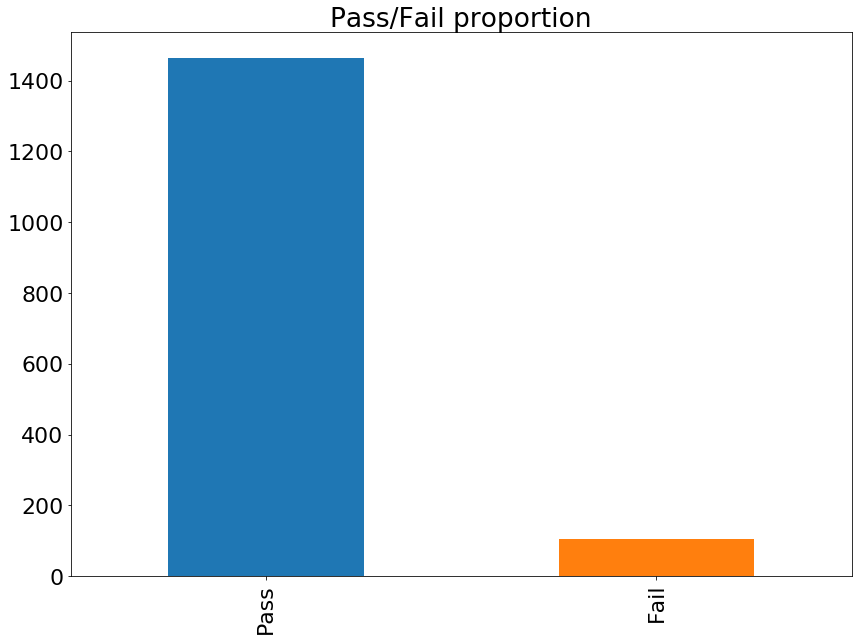

In [7]:
counts.plot("bar", title="Pass/Fail proportion")

In [8]:
counts["Fail"] / counts.sum()

0.06636885768985322

In [9]:
secom_labels.head()

,s_label_target,s_label_datetime
0,Pass,2008-07-19 11:55:00
1,Pass,2008-07-19 12:32:00
2,Fail,2008-07-19 13:17:00
3,Pass,2008-07-19 14:43:00
4,Pass,2008-07-19 15:22:00


In [10]:
secom_labels["s_label_datetime"].min()

Timestamp('2008-01-08 02:02:00')

In [11]:
secom_labels["s_label_datetime"].max()

Timestamp('2008-12-10 18:47:00')

## Check for correlations over time

In [12]:
secom_labels = data.load_secom_labels(DATA_PATH, feature_engineer=False, human_labels=True)

In [13]:
secom_labels["s_label_date"]= secom_labels["s_label_datetime"].dt.date

Plot Failure by day

In [14]:
failures_by_day = secom_labels.groupby(["s_label_target", "s_label_date"]).count()

In [15]:
failures_by_day.head()

s_label_datetime
s_label_target s_label_date                  
Fail           2008-01-08                   1
               2008-01-09                   1
               2008-01-10                   1
               2008-02-10                   5
               2008-03-09                   1

## Check for correlations over time

In [16]:
unstacked_failures_by_day = failures_by_day.unstack(-2).fillna(0)

In [17]:
unstacked_failures_by_day.columns = unstacked_failures_by_day.columns.droplevel(0,)

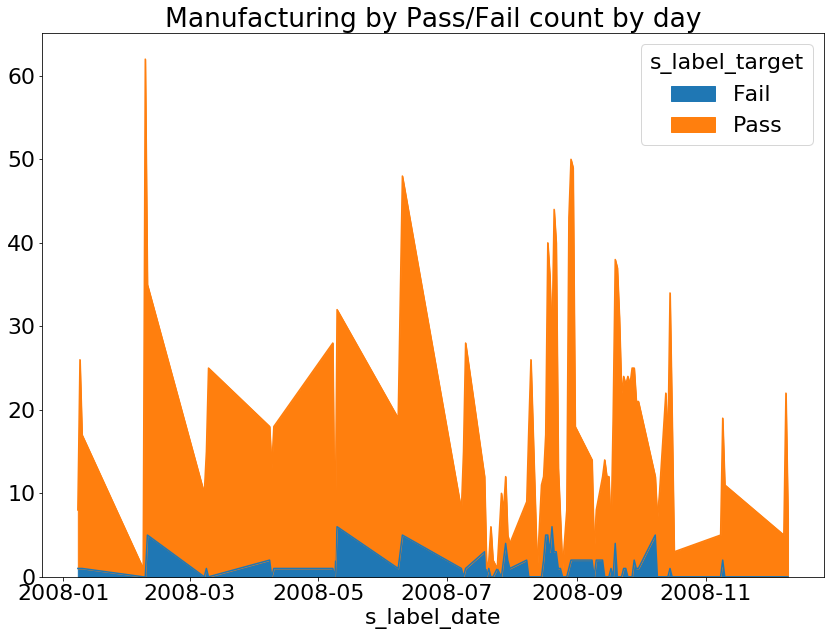

In [18]:
unstacked_failures_by_day.plot.area(title = "Manufacturing by Pass/Fail count by day")

## Plot Manufacturing Failure by week

In [19]:
secom_labels = data.load_secom_labels(DATA_PATH, feature_engineer=False, human_labels=True)
secom_labels["s_label_weekstart"]= secom_labels["s_label_datetime"].dt.to_period('W')
failures_by_week = secom_labels.groupby(["s_label_target", "s_label_weekstart"]).count()
unstacked_failures_by_week = failures_by_week.unstack(-2).fillna(0)
unstacked_failures_by_week.columns = unstacked_failures_by_week.columns.droplevel(0,)

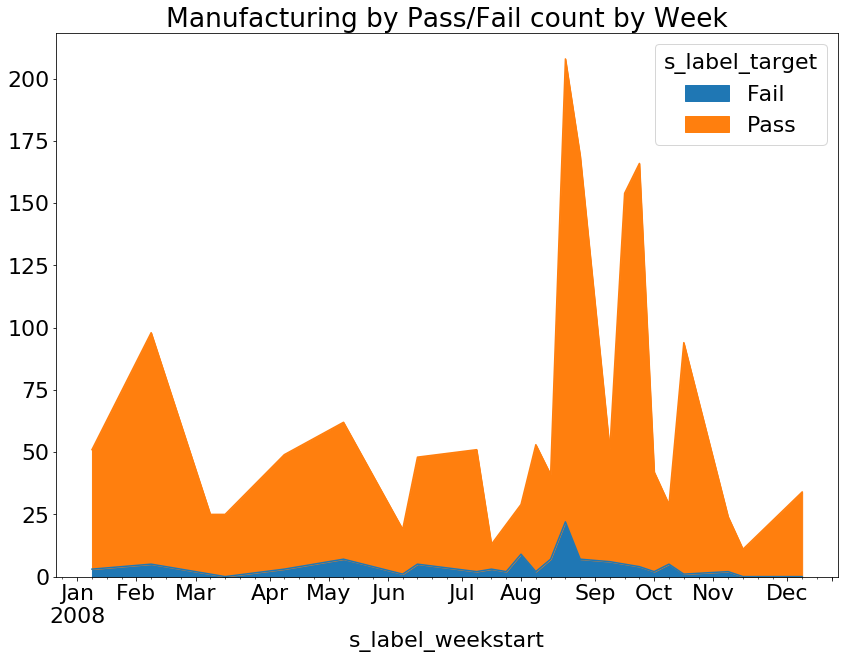

In [20]:
unstacked_failures_by_week.plot.area(title = "Manufacturing by Pass/Fail count by Week")

## Plot Manufacturing Failure by Month

In [21]:
secom_labels = data.load_secom_labels("../../data", feature_engineer=False, human_labels=True)
secom_labels["s_label_month"]= secom_labels["s_label_datetime"].dt.to_period('M')
failures_by_month = secom_labels.groupby(["s_label_target", "s_label_month"]).count()
unstacked_failures_by_month = failures_by_month.unstack(-2).fillna(0)
unstacked_failures_by_month.columns = unstacked_failures_by_month.columns.droplevel(0,)

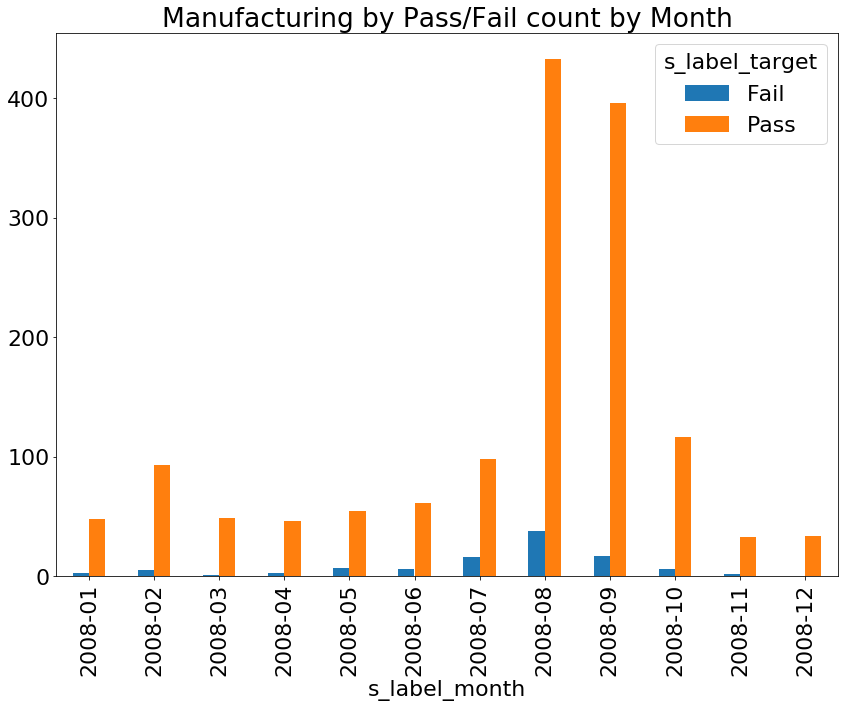

In [22]:
unstacked_failures_by_month.plot.bar(title = "Manufacturing by Pass/Fail count by Month")

## Check failure as a proportion of of month

In [23]:
unstacked_failures_by_month["Total"] = unstacked_failures_by_month.sum(axis=1)
unstacked_failures_by_month.head()

s_label_target,Fail,Pass,Total
s_label_month,,,
2008-01,3.0,48.0,51.0
2008-02,5.0,93.0,98.0
2008-03,1.0,49.0,50.0
2008-04,3.0,46.0,49.0
2008-05,7.0,55.0,62.0


Text(0, 0.5, 'Percentage Failure from Total')

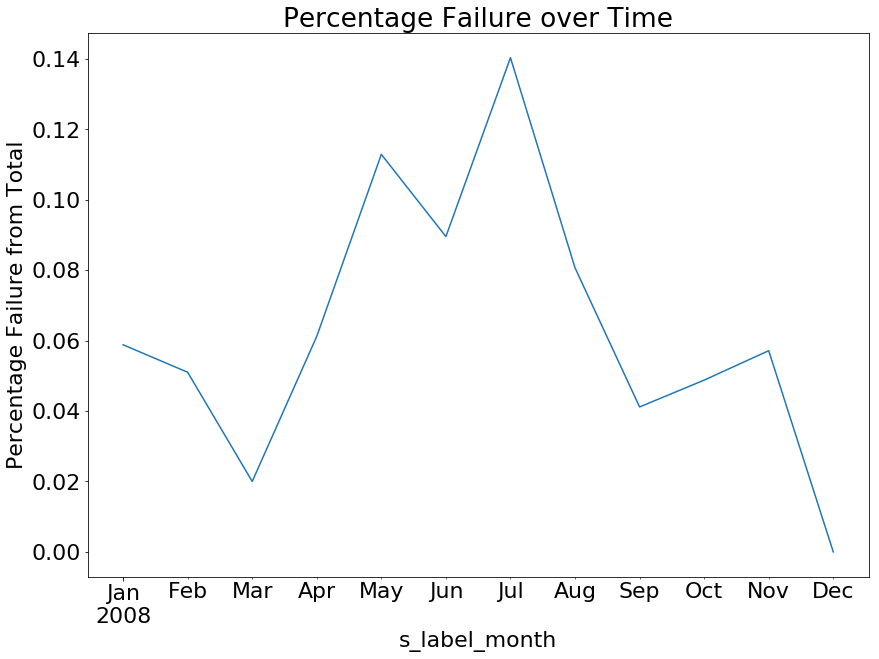

In [24]:
percentage_failure_per_month = unstacked_failures_by_month["Fail"] / unstacked_failures_by_month["Total"]
ax =percentage_failure_per_month.plot("line", title="Percentage Failure over Time")
ax.set_ylabel("Percentage Failure from Total")

# Check Failure per Supplier

In [25]:
secom_labels = data.load_secom_labels(DATA_PATH, human_labels=True, feature_engineer=False)
vendor_data = data.load_vendor_json(DATA_PATH, feature_engineer=False)
df = vendor_data.merge(secom_labels, left_index = True, right_index=True)

In [26]:
df.head()

,json_datetime,json_mat_vendor,json_part_vendor,json_sil_vendor,json_adhs_vendor,json_sop_vendor,s_label_target,s_label_datetime
0,2008-07-19 11:55:00,ddd,aaa,ddd,bbb,eee,Pass,2008-07-19 11:55:00
1,2008-07-19 12:32:00,eee,ccc,ddd,aaa,aaa,Pass,2008-07-19 12:32:00
2,2008-07-19 13:17:00,fff,aaa,eee,aaa,jjj,Fail,2008-07-19 13:17:00
3,2008-07-19 14:43:00,ccc,ccc,hhh,aaa,eee,Pass,2008-07-19 14:43:00
4,2008-07-19 15:22:00,ccc,bbb,aaa,bbb,iii,Pass,2008-07-19 15:22:00


In [27]:
def plot_failure_by_suppliertype(df, supplier_type):
    failure_by_supplier = df[[supplier_type, "s_label_target", "s_label_datetime"]].groupby([supplier_type, "s_label_target"]).count()
    failure_by_supplier = failure_by_supplier.unstack(-1).fillna(0)
    failure_by_supplier.columns = failure_by_supplier.columns.droplevel(0,)
    failure_by_supplier.plot(kind="bar", title = "Count of Pass and Fail by Supplier Type {}".format(supplier_type))
    
    return

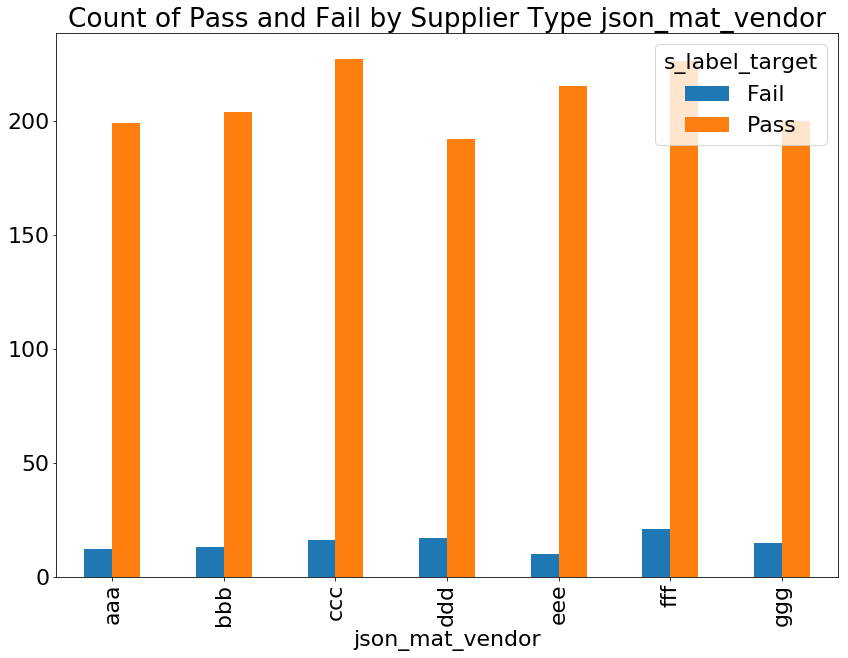

In [28]:
plot_failure_by_suppliertype(df, "json_mat_vendor")

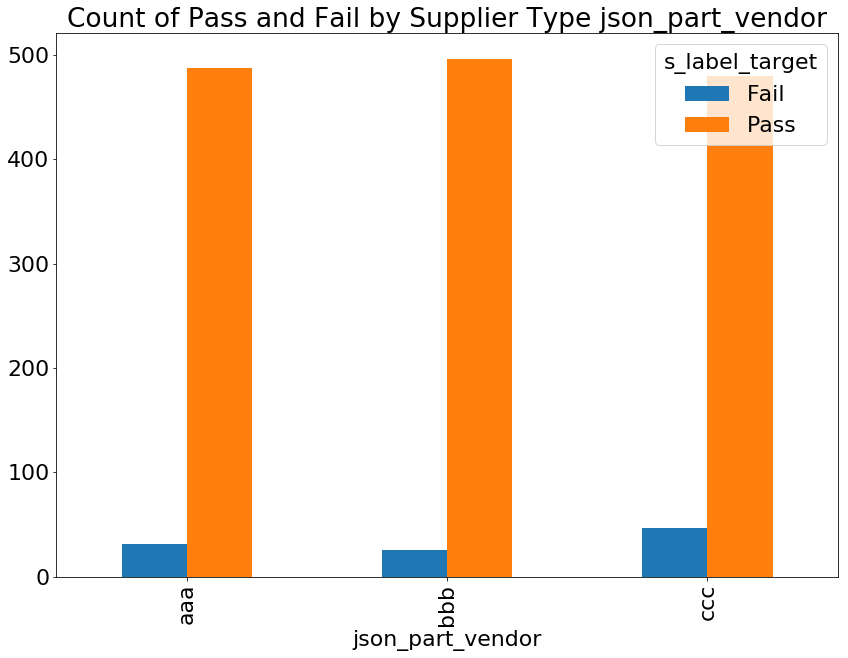

In [29]:
plot_failure_by_suppliertype(df, "json_part_vendor")

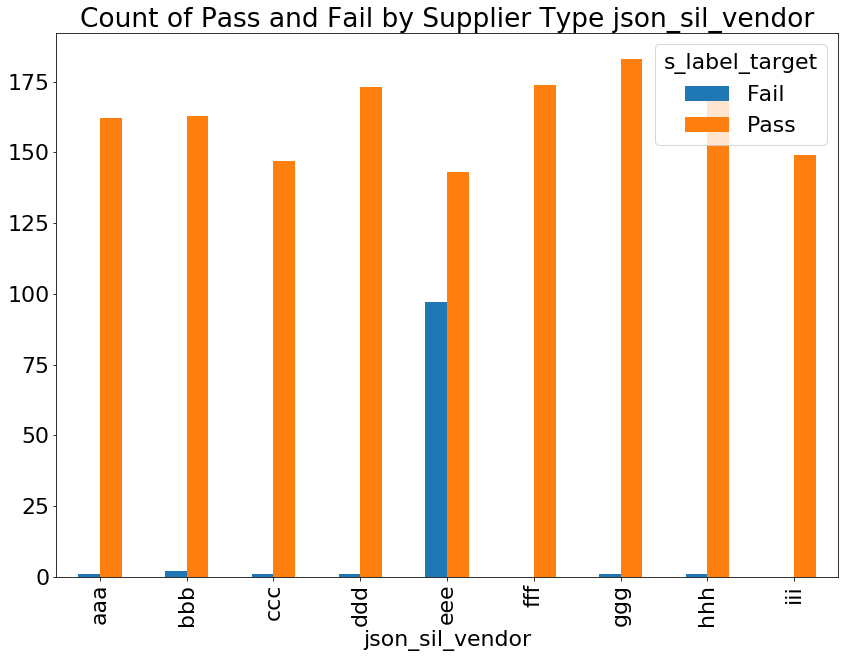

In [30]:
plot_failure_by_suppliertype(df, "json_sil_vendor")

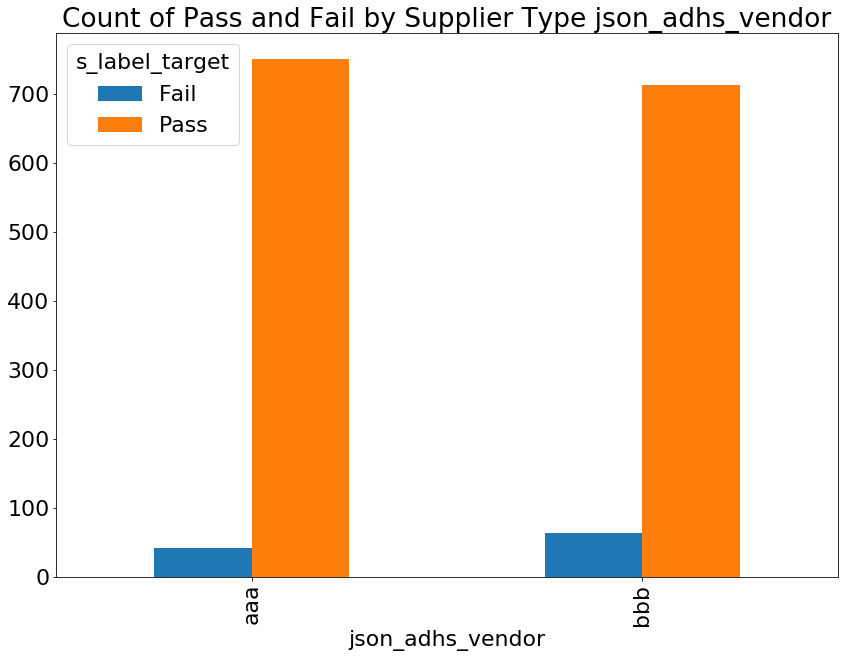

In [31]:
plot_failure_by_suppliertype(df, "json_adhs_vendor")

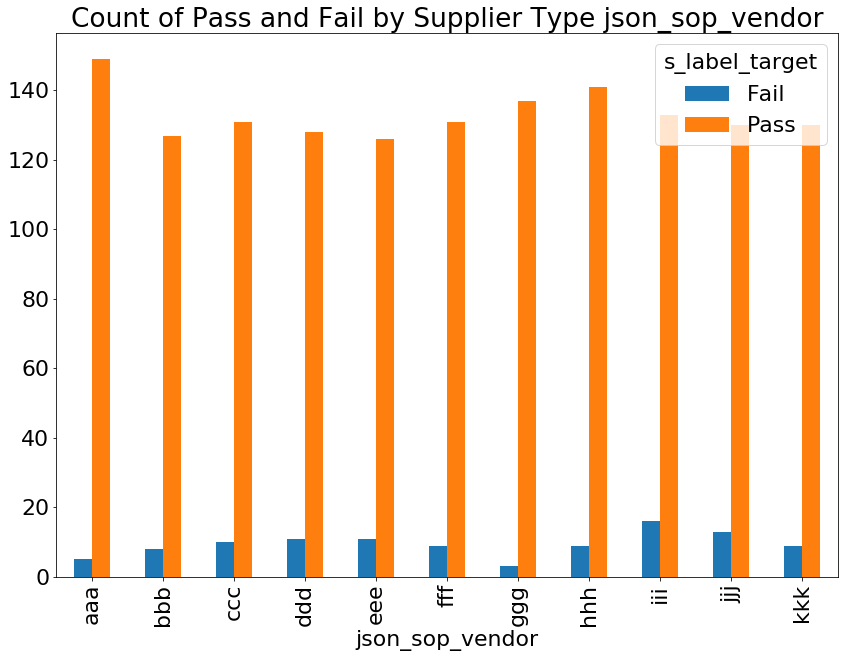

In [32]:
plot_failure_by_suppliertype(df, "json_sop_vendor")

### Investigate json_sil_vendor eee in further detail

In [33]:
df_eee = df[df["json_sil_vendor"] == "eee"]

df_eee["s_label_weekstart"]= df_eee["s_label_datetime"].dt.to_period('W')
failures_by_week_eee = df_eee[["s_label_target", "s_label_weekstart", "s_label_datetime"]].groupby(["s_label_target", "s_label_weekstart"]).count()
unstacked_failures_by_week_eee = failures_by_week_eee.unstack(-2).fillna(0)
unstacked_failures_by_week_eee.columns = unstacked_failures_by_week_eee.columns.droplevel(0,)

/home/canyon/miniconda3/envs/secom/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
unstacked_failures_by_week_eee

s_label_target,Fail,Pass
s_label_weekstart,,
2008-01-07/2008-01-13,3.0,7.0
2008-02-04/2008-02-10,4.0,6.0
2008-03-03/2008-03-09,1.0,1.0
2008-03-10/2008-03-16,0.0,2.0
2008-04-07/2008-04-13,3.0,5.0
2008-05-05/2008-05-11,7.0,5.0
2008-06-02/2008-06-08,1.0,1.0
2008-06-09/2008-06-15,4.0,5.0
2008-07-07/2008-07-13,2.0,5.0


In [35]:
unstacked_failures_by_week_eee.sum(axis=0)

s_label_target
Fail     97.0
Pass    143.0
dtype: float64

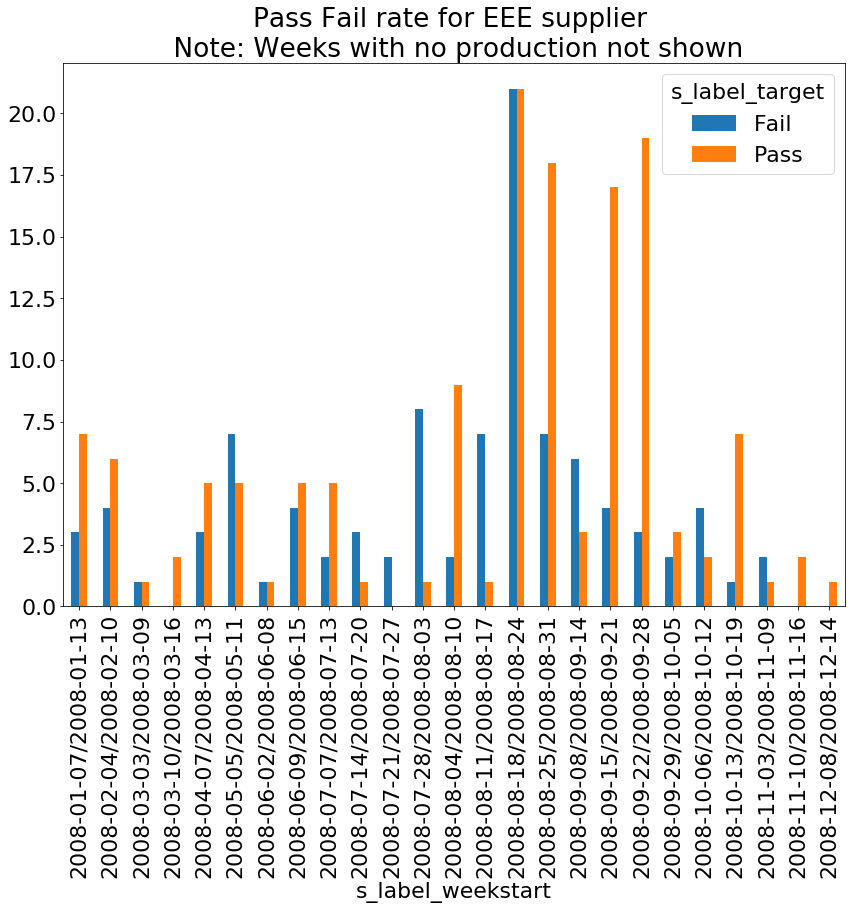

In [36]:
unstacked_failures_by_week_eee.plot(kind="bar", title = "Pass Fail rate for EEE supplier \n Note: Weeks with no production not shown" )

## Check Null Value rate in secom_features

In [37]:
secom_features = data.load_secom_features(DATA_PATH)

In [38]:
secom_features.head().isnull()

,s_data_0,s_data_1,s_data_2,s_data_3,s_data_4,s_data_5,s_data_6,s_data_7,s_data_8,s_data_9,...,s_data_580,s_data_581,s_data_582,s_data_583,s_data_584,s_data_585,s_data_586,s_data_587,s_data_588,s_data_589
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [39]:
# Figure out null rate in each column
secom_features.isnull().sum().sort_values(ascending=False)

s_data_158    1429
s_data_157    1429
s_data_292    1429
s_data_293    1429
s_data_220    1341
s_data_492    1341
s_data_85     1341
s_data_358    1341
s_data_245    1018
s_data_518    1018
s_data_517    1018
s_data_516    1018
s_data_244    1018
s_data_109    1018
s_data_110    1018
s_data_111    1018
s_data_384    1018
s_data_383    1018
s_data_382    1018
s_data_246    1018
s_data_578     949
s_data_579     949
s_data_580     949
s_data_581     949
s_data_72      794
s_data_346     794
s_data_345     794
s_data_73      794
s_data_247     715
s_data_519     715
              ... 
s_data_360       0
s_data_361       0
s_data_386       0
s_data_387       0
s_data_389       0
s_data_223       0
s_data_390       0
s_data_86        0
s_data_87        0
s_data_88        0
s_data_392       0
s_data_393       0
s_data_114       0
s_data_115       0
s_data_116       0
s_data_117       0
s_data_119       0
s_data_120       0
s_data_493       0
s_data_494       0
s_data_495       0
s_data_156  

In [40]:
# Figure out null rate in each row
secom_features.isnull().sum(axis=1).sort_values(ascending=False)

1566    152
1564    148
1561    140
1152    100
511     100
810      99
814      96
95       96
93       96
995      92
1054     92
735      88
89       87
846      84
700      84
512      84
133      84
299      80
1206     76
752      72
928      68
1234     68
94       68
807      64
316      64
336      64
1560     60
1565     60
1552     60
1555     60
       ... 
935       8
938       8
835       8
833       8
1170      8
1307      8
1219      8
1317      8
871       8
955       8
1321      8
1326      8
1136      8
853       8
1177      8
973       8
962       8
1267      8
957       8
822       8
1180      8
952       4
1455      4
1246      4
843       4
1208      4
817       4
773       4
1256      4
852       4
Length: 1567, dtype: int64